## Method, Assumption and Overview
Sense we aim to predict fraudulent transactions based on 'fraud_encoded' dataset, we will evaluate two Machine Learning models that could potentially produce accurate results. The main metric we take into account when running **confusion metrics is recall**, as the main aim is to identify fraudulent transactions with high accuracy.
<br>
The models to be evaluated are:
1. Logistic regression -> As it predicts binary result
2. Decision Tree -> As it ables to take into account multiple features when evaluating weather a certain transaction is/n't fraudulent. 

**Assumption**
*Decision tree* is likely to perform better as our data cleansing and manipulation and engineering indicated that there is no correlation coefficient between a feature in the dataset with the 'is_fraud' feature and therefor, multple compinations of features will cetain values create fraudulent trasaction. 

In [137]:
# IMPORTING DEPENDENCIES
# ----------------------------------------------------------------
#NOTE: Analysis libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#NOTE: Importing model libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report # * Testing methods 
from sklearn.tree import plot_tree # * Tree plotting function
from sklearn.metrics import make_scorer, recall_score

# * This library will be used to optimise the parameters of the decision tree
from sklearn.model_selection import GridSearchCV

# * Pickling library
import pickle

In [2]:
# Randering encoded data
    # * File path (relative)
path = "/Users/galbeeir/Desktop/git/Project 4 - Fradulent Transactions/fraudulent_transactions/ML_and_dashboard/ML/Data/Fraud_Encoded.csv" 

    # * Loading the file - Pandas
fraud_df = pd.read_csv(path)
fraud_df.head()

,trans_date_trans_time,merchant,category,amt,first,last,street,city,state,zip,...,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,gender_F,gender_M
0,0.723521,0.001959,0.002229,-0.421990,0.005452,0.004327,0.005452,0.005452,0.005655,-0.729275,...,0.675910,0.812151,0.006078,-0.320383,0.722319,-0.891684,0.656063,0,0,1
1,0.723522,0.002299,0.002229,-0.252575,0.005464,0.005318,0.004785,0.004785,0.003972,1.309015,...,-1.469910,-0.293019,0.004719,0.934113,0.722319,0.178534,-1.434080,0,1,0
2,0.723523,0.001214,0.001510,-0.180740,0.003895,0.005051,0.001918,0.001918,0.006113,-1.380235,...,1.214101,-0.179602,0.003762,-0.171555,0.722320,0.383272,1.165130,0,1,0
3,0.723524,0.004274,0.002819,-0.062878,0.008014,0.005318,0.004568,0.004568,0.005496,-0.596435,...,0.684376,-0.112365,0.013134,0.791421,0.722322,-1.905079,0.679149,0,0,1
4,0.723524,0.001665,0.002692,-0.419918,0.004822,0.005736,0.003761,0.003761,0.004542,0.030457,...,0.379028,-0.290286,0.006817,-1.050363,0.722322,1.257476,0.315647,0,0,1


In [3]:
# * printing the features
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  float64
 1   merchant               float64
 2   category               float64
 3   amt                    float64
 4   first                  float64
 5   last                   float64
 6   street                 float64
 7   city                   float64
 8   state                  float64
 9   zip                    float64
 10  lat                    float64
 11  long                   float64
 12  city_pop               float64
 13  job                    float64
 14  dob                    float64
 15  unix_time              float64
 16  merch_lat              float64
 17  merch_long             float64
 18  is_fraud               int64  
 19  gender_F               int64  
 20  gender_M               int64  
dtypes: float64(18), int64(3)
memory usage: 296.8 MB


As we can see, we can reduce our features further by removing the gender_M / gender_F columns as it is clear that 0 is male 1 will be female for example.

In [4]:
# Removing a gender column and validating the removal
fraud_df = fraud_df.drop('gender_F', axis=1).rename(columns={'gender_M': "gender"})
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  float64
 1   merchant               float64
 2   category               float64
 3   amt                    float64
 4   first                  float64
 5   last                   float64
 6   street                 float64
 7   city                   float64
 8   state                  float64
 9   zip                    float64
 10  lat                    float64
 11  long                   float64
 12  city_pop               float64
 13  job                    float64
 14  dob                    float64
 15  unix_time              float64
 16  merch_lat              float64
 17  merch_long             float64
 18  is_fraud               int64  
 19  gender                 int64  
dtypes: float64(18), int64(2)
memory usage: 282.7 MB


In [5]:
# Splitting the encoded data target and features variables
    # * Target Variable
y = fraud_df['is_fraud'].values.reshape(-1, 1)
    # * Features to evaluate against the target variable
X = fraud_df.drop('is_fraud', axis=1)

In [6]:
# Splitting the dataset into test and train datasets with random state of 2023
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023)

### Creating logistic regression model

In [7]:
# Instantiating the LogisticRegression model
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

# * Fitting the model
lr_model.fit(X_train, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [8]:
# Make a prediction using the testing data
lr_reg_predictions = lr_model.predict(X_test)

In [9]:
# Defining a function to create a confusion metrix visual
def confusionM_plot(metrix):
    # * Generating a confusion matrix heatmap
    sns.heatmap(metrix, cmap='coolwarm', fmt='d', annot=True, linewidth=1)

# Altering the heat map specifications
    # * Changing the x, y labels and adding a title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    # * Changing the x, y ticks by adding a label
    plt.xticks(ticks=[0.5, 1.5], labels =['Non-Fradulent (0)', 'Fradulent (1)'])
    plt.yticks(ticks=[0.5, 1.5], labels =['Non-Fradulent (0)', 'Fradulent (1)'])

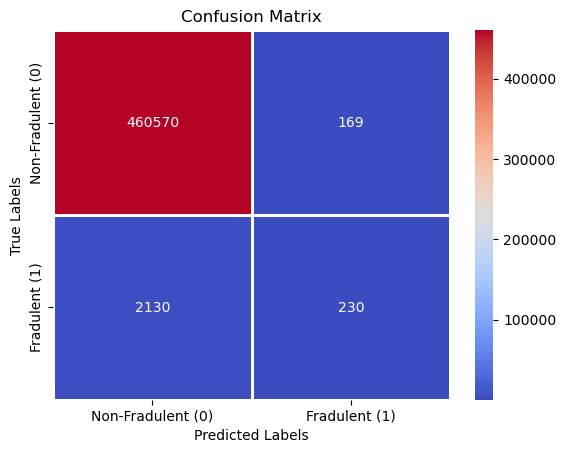

In [10]:
# Evaluating the model's performance with Classification report & Confusion Metrix
cf_metrix = confusion_matrix(y_test, lr_reg_predictions)

confusionM_plot(cf_metrix)

Going by the confusion metrix above, we can already see that the model performs poorly when it comes to recall, it can bealy identify fradulent transactions, let see the results in the classification report

In [11]:
print(classification_report(y_test, lr_reg_predictions, target_names=['Non-Fradulent', 'Fradulent']))

               precision    recall  f1-score   support

Non-Fradulent       1.00      1.00      1.00    460739
    Fradulent       0.58      0.10      0.17      2360

     accuracy                           1.00    463099
    macro avg       0.79      0.55      0.58    463099
 weighted avg       0.99      1.00      0.99    463099



Recall score of 0.1 confirms that the model can hardly identify fradulent transactions. In addition, a score of 0.58 can hardly be considered as high accuracy with precision as the precision metric indicates that the model predicts fradulent transactions and is correct only 0.58 of the times. 

---

### Decision Tree Model

In [34]:
# Let's first define a function to plot the evaluated the tree results every with different components to measure accuracy
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds, target_names=['Non-Fradulent', 'Fradulent']))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [14]:
# Instantiating the DecisionTree Model - Default Model (no modifications)
default_tree_model = DecisionTreeClassifier()

In [15]:
# Fitting the model
default_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Model predictions
default_pred = default_tree_model.predict(X_test)

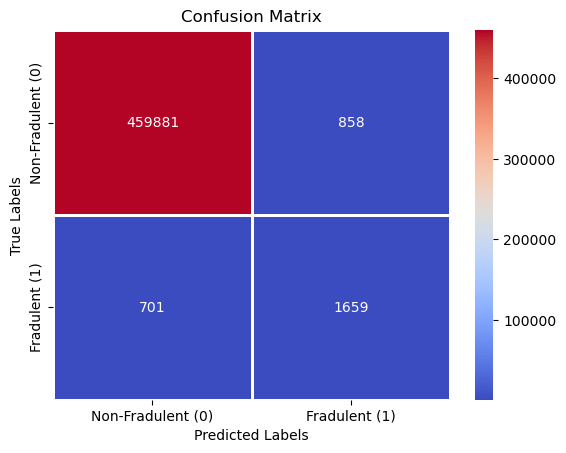

In [21]:
# Creating a confusion metrix instance 
cf_tree_default_metrix = confusion_matrix(y_test, default_pred)

    # * Plotting the confusion matrix
confusionM_plot(cf_tree_default_metrix)

At first glance we can already see an improvement in performance with identifying fradulent transactions.

               precision    recall  f1-score   support

Non-Fradulent       1.00      1.00      1.00    460739
    Fradulent       0.66      0.70      0.68      2360

     accuracy                           1.00    463099
    macro avg       0.83      0.85      0.84    463099
 weighted avg       1.00      1.00      1.00    463099





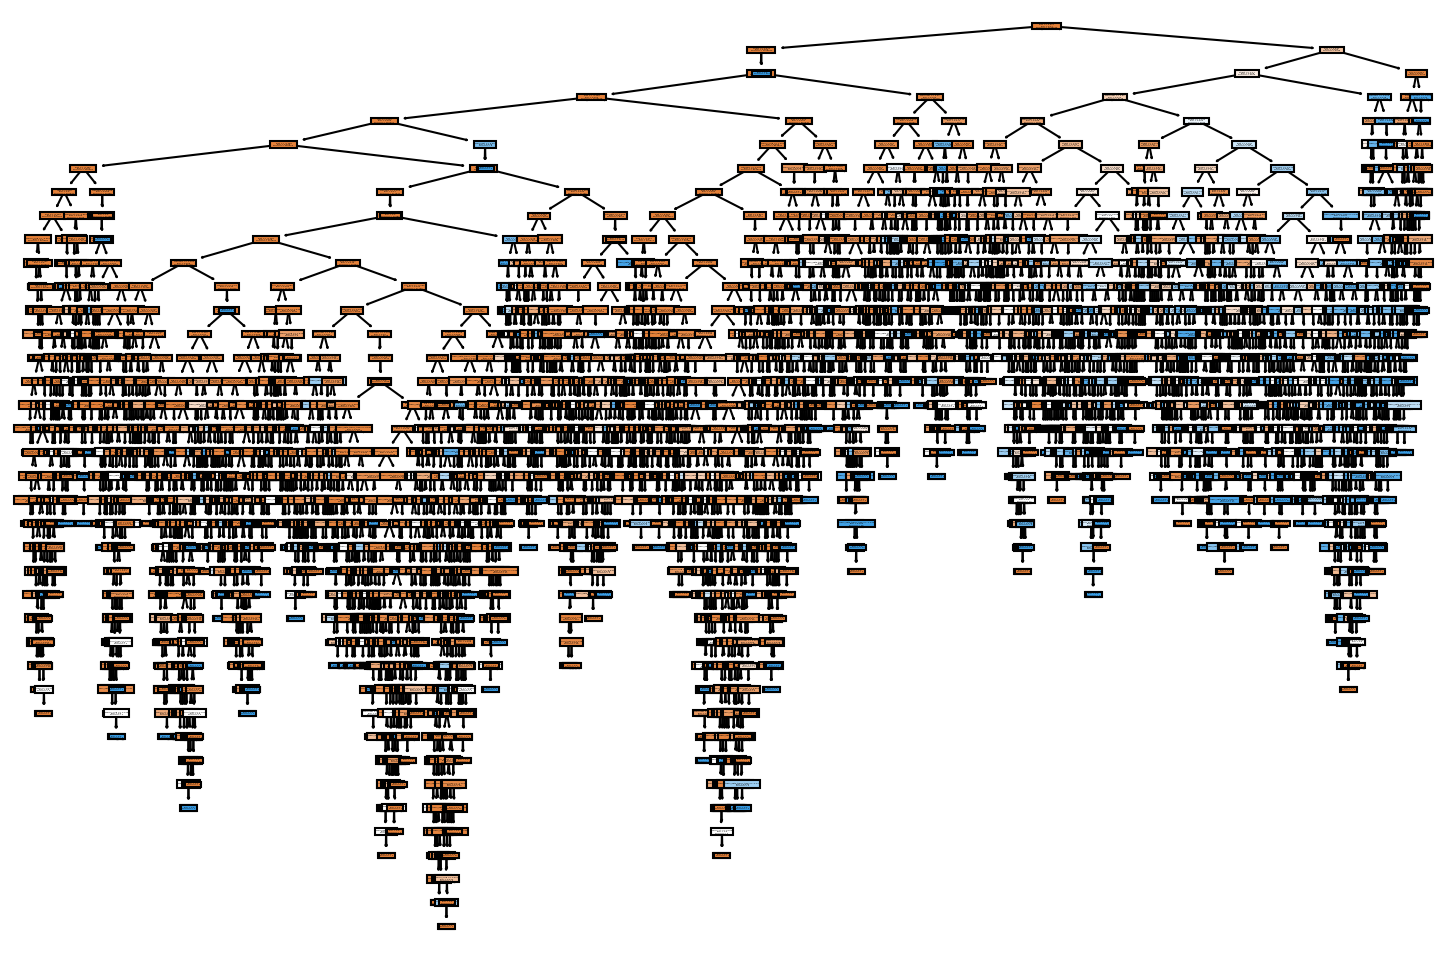

In [35]:
# Plotting the tree couple with the Classifcation report
report_model(default_tree_model)

In [33]:
# Creating a measure importance dataframe
default_feature_importance = pd.DataFrame(data = default_tree_model.feature_importances_, index=X.columns, columns=["Feature Importance"]).sort_values(by="Feature Importance",ascending=False)
default_feature_importance

,Feature Importance
amt,0.305409
category,0.258224
street,0.100811
merchant,0.067331
unix_time,0.034186
dob,0.029363
merch_lat,0.029227
merch_long,0.028249
trans_date_trans_time,0.028117
city_pop,0.022356


In [12]:
# Printing the model parameters
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [98]:
# Creating a model with the following specifications
    # * criterion => 'gini'
    # * splitter => 'log_loss'
    # * max_depth => 10 
    # * random_state => 72
    # * max_features => 10
spec_tree_model = DecisionTreeClassifier(
    criterion = 'log_loss',
    splitter = 'best',
    max_depth = 12, 
    random_state = 72,
    max_features = 10
)

In [99]:
# Fitting the model
spec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=12, max_features=10,
                       random_state=72)

In [100]:
# Spec predictions 
spec_pred = spec_tree_model.predict(X_test)

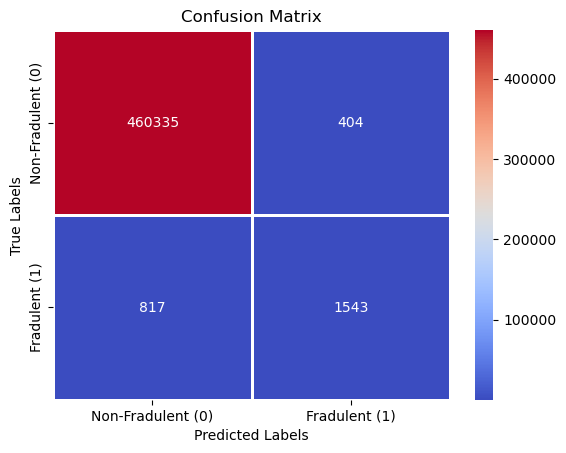

In [101]:
# Showing the confusion metrics scores
spec_cx = confusion_matrix(y_test, spec_pred)

# * Plotting the confusion scores
confusionM_plot(spec_cx)

As expected, sense, we've reduced the amount of leaves and branches in the model we are receiving a performance reduction, however, not substantial reduction in performance.

               precision    recall  f1-score   support

Non-Fradulent       1.00      1.00      1.00    460739
    Fradulent       0.79      0.65      0.72      2360

     accuracy                           1.00    463099
    macro avg       0.90      0.83      0.86    463099
 weighted avg       1.00      1.00      1.00    463099





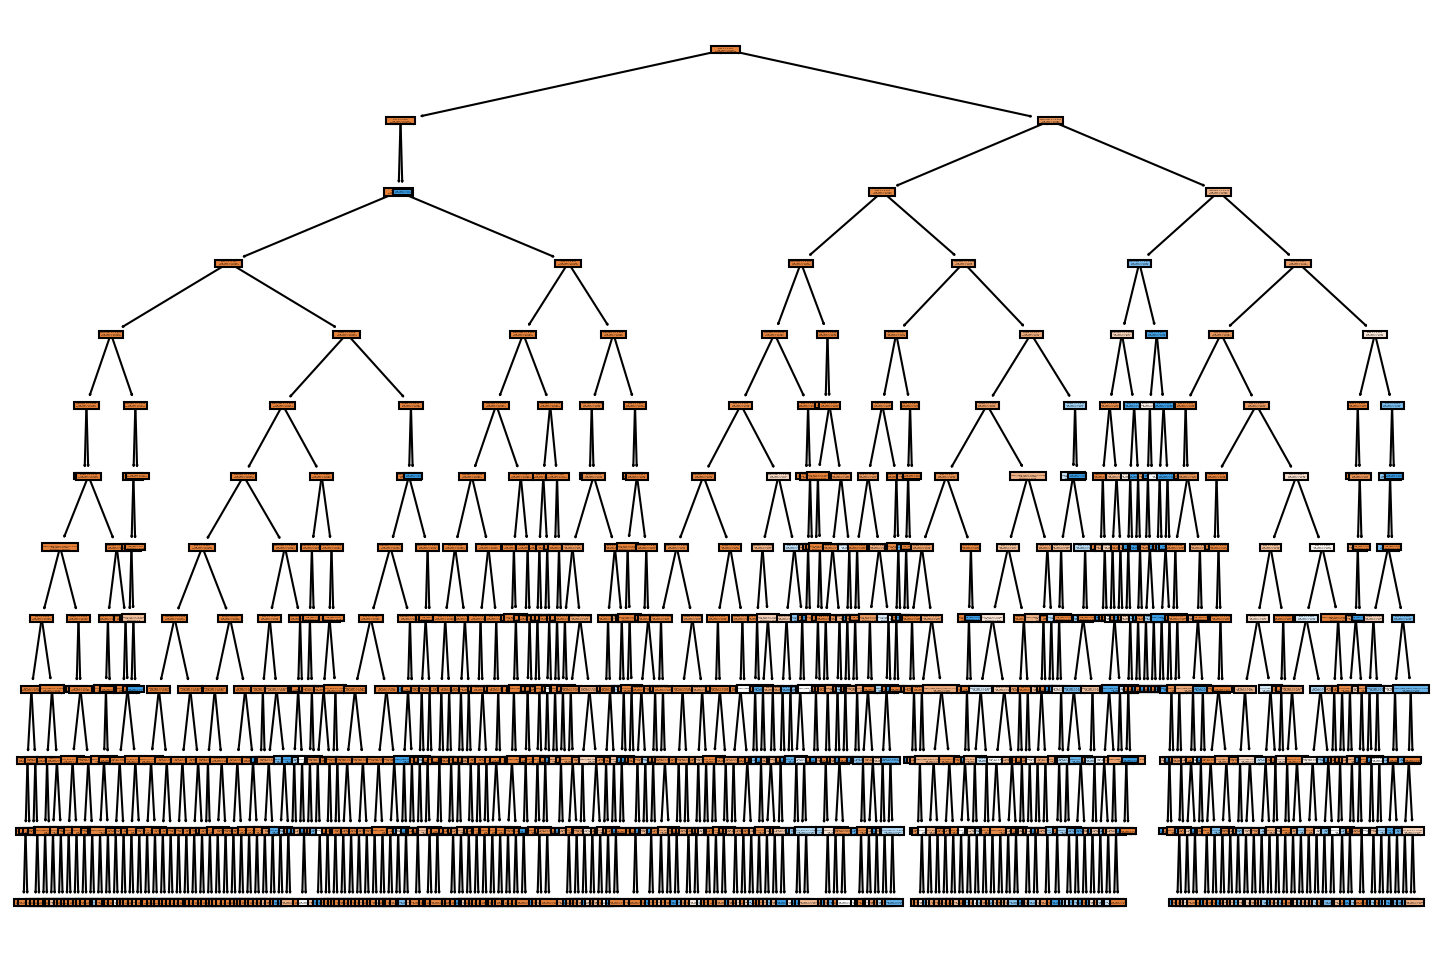

In [102]:
# Plotting the tree with classification report 
report_model(spec_tree_model)

The log_loss criterion in a decision tree classifier is a measure of how well the model predicts probabilities for each class, in our case, fraudulent and non-fraudulent transactions. Instrastingly, the model, with reduced amount of leaves was able to score 0.65 with only 0.05 differnce from the default model.

In [138]:
# Calculating the weight ratio between fruadulent and non-fraudulent transactions
    # ? By setting the appropriate weight ratio, you are telling the classifier to give more importance to the minority class during the training process. 
weight_ratio = fraud_df['is_fraud'].loc[fraud_df['is_fraud']==0].count() / fraud_df['is_fraud'].loc[fraud_df['is_fraud']==1].count()

In [139]:
# Defining the parameters to be evaluated in the model
tree_para = {'criterion':['gini','entropy', 'log_loss'],
             'max_depth':[7,8,9,10,11,12],
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [8000,10000,15000,25000, 30000],
             'class_weight': [{0: 1, 1: weight_ratio}]}

# Define the scorer based on recall score
    # ? Focusing the model on recall score
scorer = make_scorer(recall_score)

# Initialize your DecisionTreeClassifier with desired parameters
model = DecisionTreeClassifier()

# Runing a grid search to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=tree_para, n_jobs=4, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'class_weight': [{0: 1, 1: 190.93803750906642}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [8000, 10000, 15000, 25000,
                                               30000]},
             scoring=make_scorer(recall_score))

In [141]:
# Printing the optimal params
optimal_params = grid_search.best_params_
optimal_params

{'class_weight': {0: 1, 1: 190.93803750906642},
 'criterion': 'log_loss',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_split': 8000}

In [142]:
# Instantiating the model with the optimal parameters
tree_class = DecisionTreeClassifier(class_weight= {0: 1, 1: 190.93803750906642},
                                    criterion='log_loss',
                                    max_depth=12,
                                    max_features='log2',
                                    min_samples_split=8000)

In [143]:
# Fitting the model
tree_class.fit(X_train, y_train)

# predictions optimal model
tree_pred = tree_class.predict(X_test)

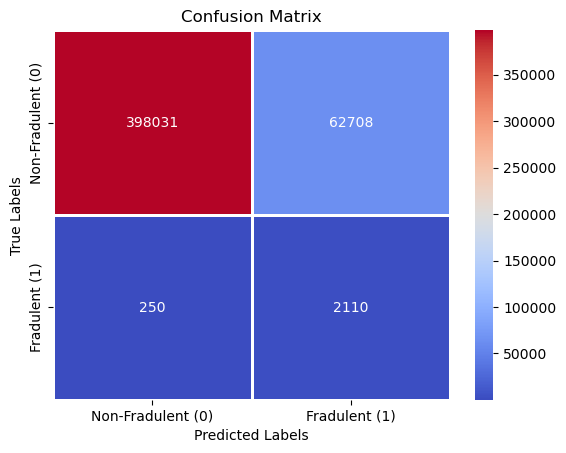

In [145]:
# Creating confusion metrix
tree_cx = confusion_matrix(y_test, tree_pred)

# Plot the confusion matrix
confusionM_plot(tree_cx)

               precision    recall  f1-score   support

Non-Fradulent       1.00      0.86      0.93    460739
    Fradulent       0.03      0.89      0.06      2360

     accuracy                           0.86    463099
    macro avg       0.52      0.88      0.49    463099
 weighted avg       0.99      0.86      0.92    463099





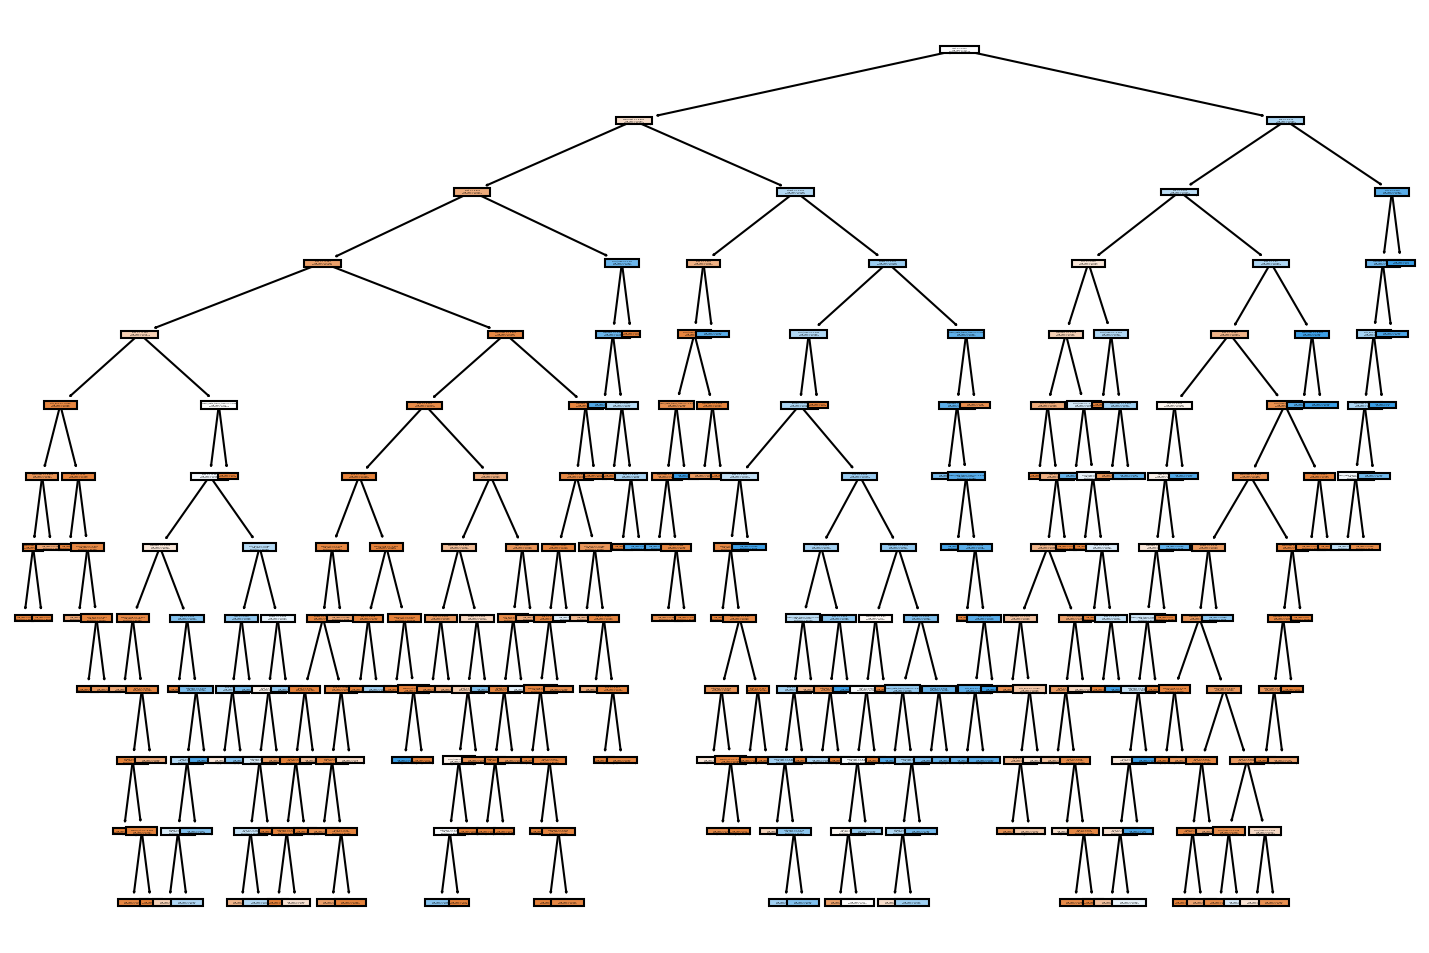

In [146]:
# Plotting the tree & printing the classification report
report_model(tree_class)

### Model Summary
To enhance our model's performance and focus, we employed `GridSearchCV`, utilizing a recall scorer as the primary performance metric. Additionally, we incorporated class weights into the model specifications to address the imbalance between fraudulent and non-fraudulent transactions. By carefully setting these weights, we emphasized the importance of the minority class (fraudulent transactions) during the training process.
<br><br>
Within the GridSearchCV, we specified `cv=5`, indicating a 5-fold cross-validation strategy. This method divided our dataset into 5 equal subsets, enabling the model to undergo k-fold validation. During each iteration, the model was trained on 4 of these subsets and validated on the remaining 1 subset. This robust cross-validation approach ensured a comprehensive evaluation of our model's performance across different data subsets, providing a reliable assessment of its effectiveness.
<br>

#### Classification Report Summary
For the Non-Fraudulent class:
- **Precision**: 100% of transactions predicted as Non-Fraudulent were indeed Non-Fraudulent.
- **Recall**: The model correctly identified 86% of all actual Non-Fraudulent transactions.
<br>

For the Fraudulent class:
- **Precision**: Only 3% of instances predicted as Fraudulent were actually Fraudulent.
- **Recall**: The model correctly identified 89% of all actual Fraudulent transactions.

In [147]:
# Pickeling the model
pickle.dump(tree_class, open('model.pkl','wb'))